## EXPLORING  DATA

### Finding the right home, at the right price!!

When we first consider purchasing a home, some of the first things that come to mind is its price, the number of rooms, kitchen style, yard or living room area, after all, we consider this place our comfortable spaces where we spend times with our families and friends. However, eventhough these amenities are essential to search for in a home, we can have a good argument that paying a fair price and knowing the home's value is just as important. 

The underlining searches and analysis are going to serve as a guide to familiarize our selfs to some of the real estate market behaviors, which will help to identify different market values, trends, and factors. 

---------------------------------------------------------------------

**Our goal will be:**

To be better informed about the real estate market, which will lead to a better decision making when negotiating the price of a dream home or other real estate properties.

---------------------------------------------------------------------


**The next will be valuable questions when in search for substantial insights:**
    
    
* What do we know about the sales price of these homes?


* Is there a time of the year when people tend to buy more homes?


* How home’s characteristics drive homes prices?


* Does weather throughout the year, seems to have any relationship to any of our previous findings?

Hopefully, answers to some of these can help us have a broader view of the market, so now let's take a look at them.

------------------------------------------------------------------------

Lets first start by preparing the needed libraries:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('precision', 2)                    # Setting prices to exclude decimal points

pd.set_option('display.max_columns', 500)        # Setting DataFrame columns to show all of them

pd.options.mode.chained_assignment = None        # default='warning signs', when adding new columns to data frames


dtitles = pd.DataFrame.from_csv('Housing_data/test.csv', index_col=None)
dprices = pd.DataFrame.from_csv('Housing_data/sample_submission.csv', index_col=None)
h_data = pd.merge(dtitles, dprices, on='Id')

#### HOUSING DATA

Before our search, let's uncover the home's features that will be determining the outcome of our analysis.

In [3]:
print(h_data.columns)
print("\n")
print("Number of homes' features:", len(h_data.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We can see 81 different home's features, and through a quick overview, it seems to be some variables will probably have a higher importance than others.

------------------------------------------------------------

Now let's try to start tackling some of the questions:

#### What do we know about the sales price of these homes?

SALE PRICES FOR HOUSES SOLD
Data Summary: 


count      1459.00
mean     179183.92
std       16518.30
min      135751.32
25%      168703.01
50%      179208.67
75%      186789.41
max      281643.98
Name: SalePrice, dtype: float64

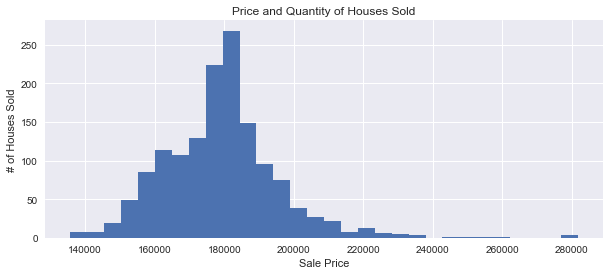

In [4]:
fig, ax = plt.subplots(figsize=(10,4))
h_data['SalePrice'].hist(bins=30)
ax.set_title('Price and Quantity of Houses Sold')
ax.set_ylabel('# of Houses Sold')
ax.set_xlabel("Sale Price")
print('SALE PRICES FOR HOUSES SOLD')
print('Data Summary: ')
h_data['SalePrice'].describe()

By first looking throuhg a general summary of the sales price of these homes, we see how we have

- A high quanity of the houses sold had a price between 170,000 and 190,000.

- Only a a couple houses were sold with an estimated price of 240,000 or more.

- Sale Prices for houses over 240,000, builds a positive skewed right distribution, giving insight that
  the mean is probably bigger than the meadian.

#### Is there a time of the year when people tend to buy more homes?


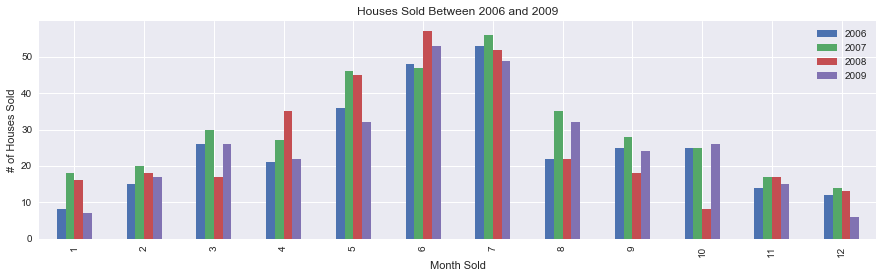

In [5]:
# NUMBER OF HOUSES SOLD EACH MONTH FOR THE YEAR 2006, 2007, 2008, 2009
h_data1 = h_data[h_data.YrSold == 2006].groupby('MoSold').size()
h_d2006 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2007].groupby('MoSold').size()
h_d2007 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2008].groupby('MoSold').size()
h_d2008 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2009].groupby('MoSold').size()
h_d2009 = h_data1.to_frame()

all_hd = pd.concat([h_d2006, h_d2007, h_d2008, h_d2009], axis=1)
col = ['2006', '2007', '2008', '2009']
all_hd.columns = col
#all_hd.head()

ax = all_hd.plot(kind='bar', figsize=(15,4))
ax.set_title('Houses Sold Between 2006 and 2009')
ax.set_ylabel('# of Houses Sold')
ax.set_xlabel('Month Sold')

- We can clearly see how people are more likely to purchase homes during summer in the months May, June, and July.
- Also, people buy less houses during winter time in the months of November, December, January, and February.
- Summer's homes sales are more than double than winter:
 - Winter to Summer months have roughly a 150% increase in sales
 - $\frac{Summer(50) - Winter(20)}{Winter(20)}  x  100 = 150\% Increase$ 

#### What are some homes' characteristics related to price?

#### Bedrooms

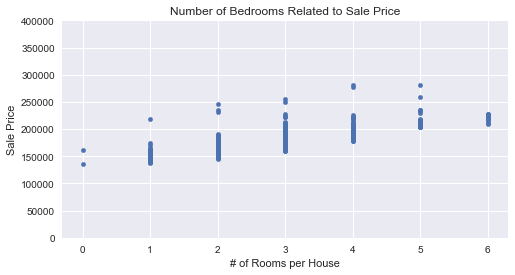

In [6]:
ax = h_data.plot(kind='scatter', x='BedroomAbvGr', y='SalePrice', figsize=(8,4), ylim=(0,400000));
ax.set_title('Number of Bedrooms Related to Sale Price')
ax.set_xlabel('# of Rooms per House')
ax.set_ylabel('Sale Price')

- 3 Bedrooms houses saw the biggest number of purchases in compare to others.
- 3 Bedroom houses had a estimate sales range price of 150,000 and 250,000.
- Two homes show 0 bedrooms and could be consider as potential outliers.
- Only a couple houses sold had 6 bedrooms, most houses had between 1 and 5 bedrooms.

#### Bathrooms

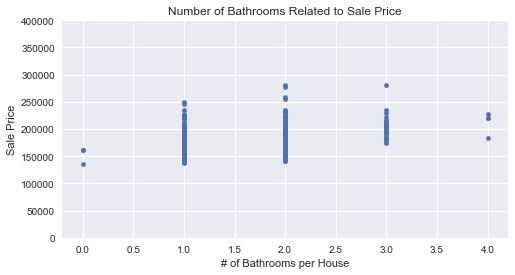

In [8]:
ax = h_data.plot(kind='scatter', x='FullBath', y='SalePrice', figsize=(8,4), ylim=(0,400000));
ax.set_title('Number of Bathrooms Related to Sale Price')
ax.set_xlabel('# of Bathrooms per House')
ax.set_ylabel('Sale Price')

- Number of bathrooms don't show a significant relationship to sale price.
- The majority of homes had between 1 and 2 bathrooms. The estimated price range is between 140,000 and 280,000.
- 2 homes seems to show 0 values for bathrooms, could be consider as outliers.
- Only a couple homes had more than 3 bathrooms.

#### Lot Area (Land)

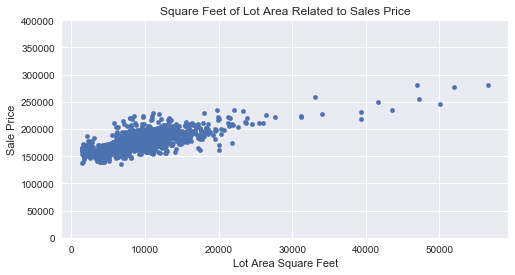

In [22]:
ax = h_data.plot(kind='scatter', x='LotArea', y='SalePrice', figsize=(8,4), ylim=(0,400000));
ax.set_title('Square Feet of Lot Area Related to Sales Price')
ax.set_xlabel('Lot Area Square Feet')
ax.set_ylabel('Sale Price')

- There is a clear relationship between Lot Square Footage and Sales Price.
- Most houses sold had an estimated Lot Square Footage range of 1,000 to 29,000 and a Sale Price range of 140,000 to 240,000.
- Only a couple houses had a Lot Square Footage of more than 30,000.

#### Living Area (House)

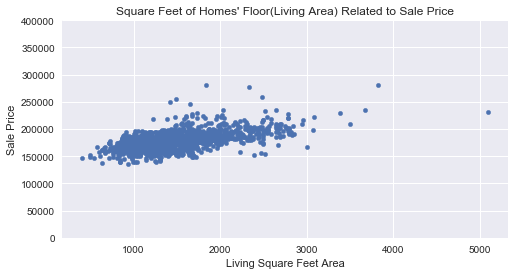

In [23]:
ax = h_data.plot(kind='scatter', x='GrLivArea', y='SalePrice', figsize=(8,4), ylim=(0,400000));
ax.set_title("Square Feet of Homes' Floor(Living Area) Related to Sale Price")
ax.set_xlabel('Living Square Feet Area')
ax.set_ylabel('Sale Price')

- There is a moderate relationship between Living Square Feet Area and Sales Price.
- Most homes sold had an estimated range of Living Square Feet Area of 400 to 3000, and Sale Price range of 140,000 to 240,000.
- Only a couple houses had a Living Square Feet Area greater than 3,000.
- One property sold had a Living Square Feet Area greater than 5,000, could be a potential outlier.

----------------------------------------------

**Lets now take a look to some of our weather data:**

For our weather data, we need to do some fixtures before we can get to analyze the data better, so let's prepare our data beforehand.

In [25]:
# Open file
weather_d = pd.DataFrame.from_csv('WeatherData/weather.csv', index_col=None)

# Sorting to data needed
weather_d1 = weather_d[weather_d.STATION_NAME == 'AMES 8 WSW IA US']                    
weather_d2 = weather_d1[(weather_d1.DATE >= 20060101) & (weather_d1.DATE <= 20091231)]
weather_d3 = weather_d2[['DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]

# Getting date to datetime,
# setting and sortinging index to ('Date')
weather_d3.loc[:, 'Date'] = pd.to_datetime(weather_d3.DATE, format='%Y%m%d')           
weather_d4 = weather_d3[['Date', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]                       


# Building and setting index to year
# and month.
weather_d4['Date'] =weather_d4.Date.dt.to_period('M')                                   
weather_data = weather_d4.set_index('Date').sort_index()                                 


 # Changed corrupted values to Not a Number(NaN)
weather_data[weather_data == -9999] = np.nan                                   

 # Changed names for columns
col = ['Avg_Prcp', 'Avg_Snow', 'Avg_Tmax', 'Avg_Tmin']                         
weather_data.columns = col


 # Getting weather averages
wth_data_avg = weather_data.groupby(weather_data.index).mean()                

# Change index type to string object
# for later merging of dataframes
wth_data_avg.index = wth_data_avg.index.map(str).rename('Year_Month')         

Now that we are done with this, lets work through some of our questions:

#### Does weather throughout the year, seems to have any relationship to any of our previous findings?

#### Precipitation

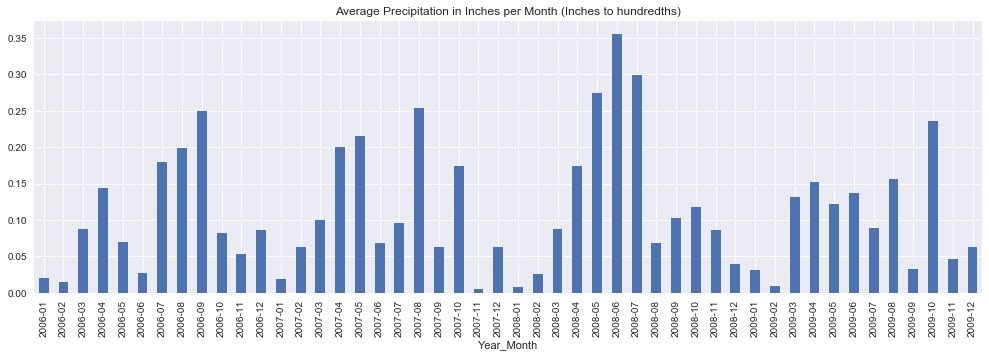

In [26]:
wth_data_avg['Avg_Prcp'].plot.bar(title='Average Precipitation in Inches per Month (Inches to hundredths)', figsize=(17,5));

- Winter months show less precipitation than the rest of the months.
- March through May has an estimated consistent amount of Precipitation of .10 inches through out the years.
- Precipitation during summer months highly variated through this 4 year period.

#### Snow

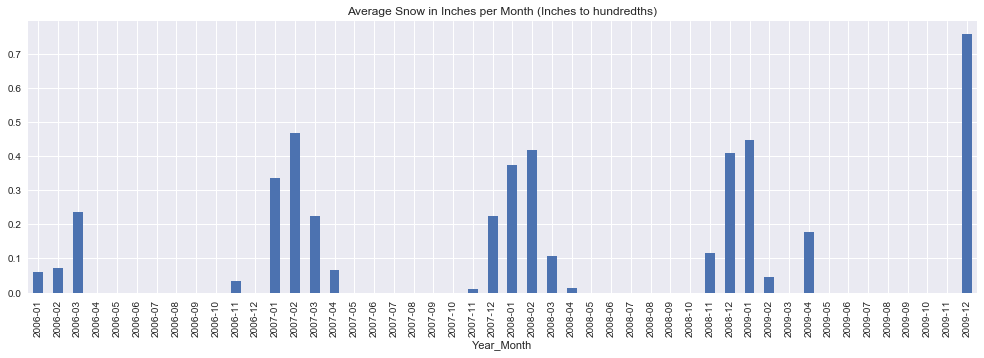

In [29]:
wth_data_avg['Avg_Snow'].plot.bar(title='Average Snow in Inches per Month (Inches to hundredths)', figsize=(17,5));

- Snow shows always present during winter months.
- May through October show no present of snow at all.

#### Temperatures

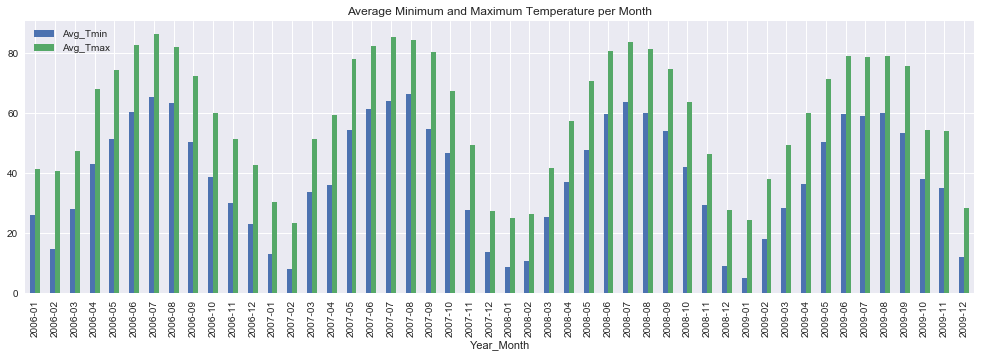

In [28]:
wth_data_avg[['Avg_Tmin', 'Avg_Tmax']].plot.bar(title='Average Minimum and Maximum Temperature per Month', figsize=(17,5));

- May through October had the highest temperatures. 
- Estimated Average Maximum Temperatures range of 70 to 85 degrees.
- December through February had the lowest temperatures. 
- Estimated Averages Minimum Temperatures range of 5 to 25 degrees.

----------------------------------------------------

### Final Toughts:

Surprisingly the visualization of the data on hand served as a significant step for us to find relevant information about these homes and their market.

 We can now see what the average price of homes is in the city, how the cost of homes increase as the number of rooms increase,  giving us insight on what a person should expect to pay for the homes in the area.

Then, we also see how people tend to buy more homes during summer when there is no snow and temperature are higher, probably turning into a seller's market from the increase in homes' demand,  and switching to a more difficult negotiation to the buyer in home prices. 

All these are valuable trends of the market and can indeed serve as a good starting point when analyzing the purchase price of a home.  Now we can go out there and hopefully find the best home at a reasonable and fair price.